#### Importing necessary Libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
os.chdir("D:\\Data Science\\Machine Leaning\\Projects\\archive")
os.getcwd()

'D:\\Data Science\\Machine Leaning\\Projects\\archive'

In [5]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Displaying Basic details about the dataset:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])
print("Shape:",df.shape)

Number of rows: 303
Number of columns: 14
Shape: (303, 14)


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#### Checking for Null values in the dataset:

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Checking the distribution of the Target variable:

In [12]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

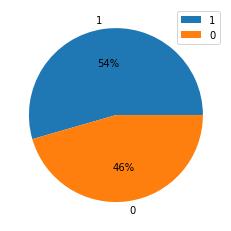

In [14]:
plt.pie(x=df['target'].value_counts(), labels = df['target'].unique(),data=df,autopct='%.0f%%')
plt.legend()
plt.show()

Therefore, 54% of the people have heart disease and 46% does not have heart disease.

0--> Healthy heart.

1--> Defective heart.

#### Checking prevalence rate:

It is used to find if the data set is balanced or not. The condition for balanced data is the minority class of the dataset should have more than 25% of data. Example: 60-40,70-30. In this the minority class is having 40 and 30 percent of data respectively. So such dataset are balanced.

We can use this to find the metrics that we will adopt for the model.

1. If the actual value is 0 and model is predicting 1, it is called 'False-Positive(FP)'.
2. If the actual value is 1 and model is predicting 0, it is called 'False-Negative(FN)'.
3. If the actual value is 0 and model is predicting 0, it is called 'True-Negative(TN)'.
4. If the actual value is 1 and model is predicting 1, it is called 'True-Positive(TP)'.

If the dataset is balanced the metrics we use is Accuracy. Else depending on 'False-Positive(FP)' and 'False-Negative(FN)' and their misclassification we can go for Precision, Recall or F1-Score.

1. If concentration is more on FP -> Metrics = Precision.

2. If concentration is more on FN -> Metrics = Recall.

3. If concentration is more on both FN and FP -> Metrics = F1-Score. [Misclassification]

4. If concentration is more on both TN and TP -> Metrics = Accuracy. [Correct Classification]


In [30]:
#Prevalence rate of the dataset
df['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

It is a balanced dataset since the minority class has 45% of data.

#### Splitting the dataset to dependent (y) and independent varaibles(x):

In [19]:
x=df.drop(columns=['target'],axis=1)
y=df.iloc[:,-1]

In [20]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

#### Splitting the dataset to test and train:

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [27]:
print("Shape of train data:")
print("Shape of X train:",X_train.shape)
print("Shape of Y train:",Y_train.shape)

print("\nShape of test data:")
print("Shape of X test:",X_test.shape)
print("Shape of Y test:",Y_test.shape)

Shape of train data:
Shape of X train: (242, 13)
Shape of Y train: (242,)

Shape of test data:
Shape of X test: (61, 13)
Shape of Y test: (61,)


#### Model training:

In [33]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=5000)

#### Checking for model accuracy:

In [42]:
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)

In [43]:
train_accuracy = accuracy_score(X_train_prediction,Y_train)
print("Accuracy on train data:",train_accuracy)

test_accuracy = accuracy_score(X_test_prediction,Y_test)
print("Accuracy on test data:",test_accuracy)

Accuracy on train data: 0.8512396694214877
Accuracy on test data: 0.8032786885245902


#### Building a predictive system: To check this I'm randomly taking some records from the dataset without the target variable to check if the model is predicting correctly or not.

Let me consider the record: (41,0,1,130,204,0,0,172,0,1.4,2,0,2)

In [56]:
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
#change the input data to numpy array
input_data_array=np.asarray(input_data)
#reshape the array
input_data_reshaped=input_data_array.reshape(1,-1)

In [57]:
prediction=model.predict(input_data_reshaped)
print(prediction)

[1]


In [58]:
if prediction ==0:
    print("Person has a healthy heart.")
else:
    print("Person has a defective heart.")

Person has a defective heart.


Let me consider the record: (60,1,0,145,282,0,0,142,1,2.8,1,2,3)

In [59]:
input_data=(60,1,0,145,282,0,0,142,1,2.8,1,2,3)
#change the input data to numpy array
input_data_array=np.asarray(input_data)
#reshape the array
input_data_reshaped=input_data_array.reshape(1,-1)

In [60]:
prediction=model.predict(input_data_reshaped)
print(prediction)

[0]


In [61]:
if prediction ==0:
    print("Person has a healthy heart.")
else:
    print("Person has a defective heart.")

Person has a healthy heart.
